سروش تابش ۹۸۱۰۰۳۷۸
# پرسش ۴

برای انجام هر مرحله از بهینه‌سازی، هر بار یک ستون از $V$
را نسبت به $U$
بهینه می‌کنیم. برای اعمال محدودیت روی نرم نیز، تعدادی معادله جدید به دستگاه اضافه می‌کنیم؛ یعنی به ماتریس $U$
ماتریس همانی اضافه می‌کنیم و به $r_j$
نیز صفر اضافه می‌کنیم. یعنی:
$$\begin{bmatrix}
r_{*j}\\
\mathbf{0}
\end{bmatrix} = 
\begin{bmatrix}
U\\
\sqrt\lambda I
\end{bmatrix} v_{*j}$$
که در اینجا $r_{*j}$،
ستون $j$
از $R$
است برای مقادیر داده شده و $v_{*j}$،
ستون $j$
از $V$
است برای مقادیر داده شده. بهینه سازی عبارت بالا، معادل با بهینه‌سازی عبارت داده شده در سوال است. 

In [1]:
using LinearAlgebra, DelimitedFiles, Plots, Clustering

data = readdlm("./data/Q4/agent-food.txt")
rpos = collect(Int64, data[:, 1:2])
r = data[:, 3]

1843-element Array{Float64,1}:
 0.0
 7.0
 0.0
 1.0
 2.0
 3.0
 5.0
 1.0
 5.0
 4.0
 3.0
 2.0
 0.0
 ⋮
 6.0
 3.0
 0.0
 3.0
 4.0
 1.0
 5.0
 6.0
 3.0
 5.0
 1.0
 0.0

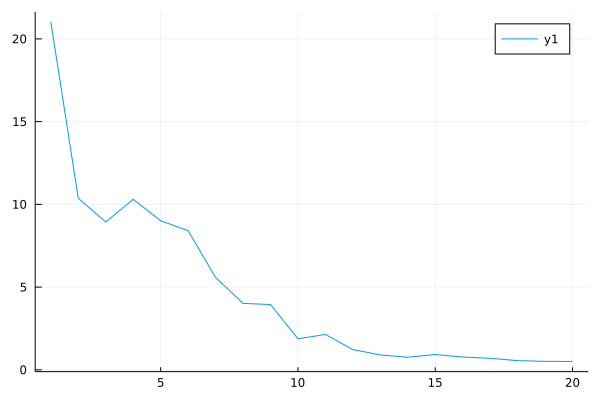

In [2]:
function ls_mat(rpos, r, P, cQ, lambda = 0.3)
    k = size(P)[2]
    Q = zeros((k, cQ))
    for j = 1:cQ
        mask = rpos[:, 2] .== j
        # println(P[rpos[mask, 1], :])
        Q[:, j] =
            [P[rpos[mask, 1], :]; Matrix(lambda * I, k, k)] \
            [r[mask]; zeros(k)]
    end
    return Q
end

function find_err(rpos, r, U, V)
    R = U * V'
    rpred = zeros(length(r))
    for i = 1:length(r)
        rpred[i] = R[rpos[i, 1], rpos[i, 2]]
    end
    return norm(r - rpred)
end

function MF_ALS(rpos, r, k = 5, max_iter = 30)
    m, n = maximum(rpos, dims = 1)
    U = rand(Float64, (m, k))
    V = zeros((n, k))
    bU = copy(U)
    bV = copy(V)
    berr = find_err(rpos, r, U, V)
    for t = 1:max_iter
        U .+= 0.01 * rand(size(U))
        V = collect(ls_mat(rpos, r, U, n)')
        V .+= 0.01 * rand(size(V))
        U = collect(ls_mat(rpos[:, [2, 1]], r, V, m)')
        err = find_err(rpos, r, U, V)
        if err < berr
            berr = err
            bU = copy(U)
            bV = copy(V)
        end
    end
    return bU, bV, berr
end

errs = []
for k = 1:20
    U, V, err = MF_ALS(rpos, r, k)
    push!(errs, err)
end
plot(errs)

همانطور که می‌بینیم، ۱۰ یک پارامتر خوب برای تعداد فیچرهای نهان است.

## پاسخ سوالات میان‌ترم

نزدیک‌ترین افراد بر اساس سلیقه‌ غذایی را بر اساس شباهت $\text{latent vector}$
های اشخاص تعیین می‌کنیم. ماتریس $UU^T$
کوریلیشن سطرهای ماتریس را نشان می‌دهد. پس کافی‌ست به سطر $i$
ام آن توجه کنیم۰

In [6]:
U, V, err = MF_ALS(rpos, r, 10)
ucorr = U * U'
sortperm(ucorr[78, :], rev = true)[2:11]

10-element Array{Int64,1}:
 251
  27
 211
 287
 250
  98
 294
 292
 254
  30

برای دسته‌بندی غذاها، از آنجایی که تعداد غذا‌ها کم و در نتیجه تعداد دسته‌ها کم خواهد بود، بنابرین باید تعداد کمتری فیچر را در نظر بگیریم در غیر این صورت $\text{kmeans}$
به خوبی عمل نخواهد کرد. برای اینجا، ۳ پارامتر خوبی برای فیچر‌های نهان است.

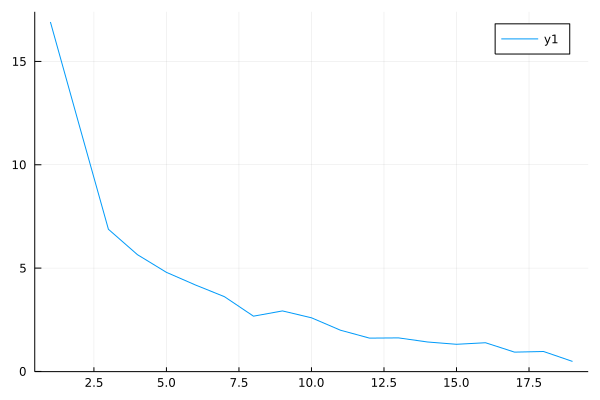

In [4]:
U, V, err = MF_ALS(rpos, r, 3)
errs = []
for k = 2:20
    err = kmeans(collect(V'), k).totalcost
    push!(errs, err)
end
display(plot(errs))

همانطور که می‌بینیم، ۷ می‌تواند تعداد خوبی برای دسته‌بندی غذاها باشد.

In [8]:
U, V, err = MF_ALS(rpos, r, 3)
asg = kmeans(collect(V'), 7).assignments
for i=1:7
    println(findall(asg.==i))
end

[5, 18, 21, 24, 35]
[4, 7, 9, 11, 12, 17, 19, 26, 27, 30, 33, 36, 37, 38]
[29, 31]
[1, 6, 20, 22, 25, 28, 32, 39, 40]
[15]
[2, 3, 8, 13, 14, 16, 23, 34]
[10]
